In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, log_loss, confusion_matrix, roc_curve, auc, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, BatchNormalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_curve, auc


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [5]:
# Load your scaled data
# df_train = pd.read_csv('/content/drive/MyDrive/AI ML Project/Train_data_Max.csv')
df_val = pd.read_csv('/content/drive/MyDrive/AI ML Project/Train_data_testing.csv')

# # Prepare the datasets
# X_train = df_train.drop('click', axis=1)
# y_train = df_train['click']
X_val = df_val.drop('click', axis=1)
y_val = df_val['click']

50000/50000 [==============================] - 82s 2ms/step
Performance on Validation Dataset:
Accuracy: 0.627564375
Log Loss: 0.6070841635198109
F1 Score: 0.6738940361893616
Classification Report:
              precision    recall  f1-score       support
0              0.920465  0.603447  0.728982  1.328067e+06
1              0.277904  0.745349  0.404857  2.719330e+05
accuracy       0.627564  0.627564  0.627564  6.275644e-01
macro avg      0.599185  0.674398  0.566919  1.600000e+06
weighted avg   0.811257  0.627564  0.673894  1.600000e+06
Confusion Matrix:
[[801418 526649]
 [ 69248 202685]]
Normalized Confusion Matrix:
[[0.60344696 0.39655304]
 [0.25465096 0.74534904]]


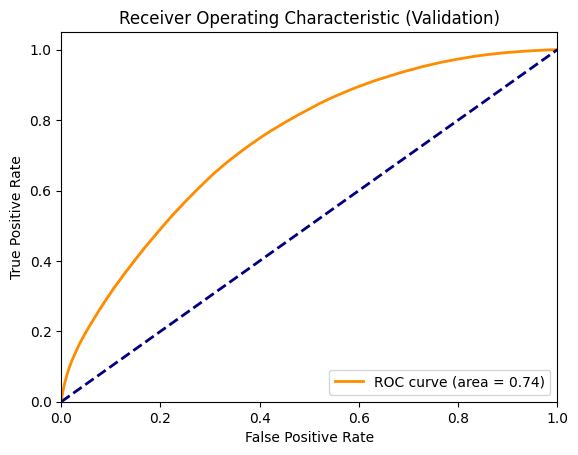

In [6]:

# Function to calculate and print performance metrics
def evaluate_performance(model, X, y, dataset_name):
    # Predict probabilities and classes
    y_pred_probs = model.predict(X)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Log Loss
    log_loss_value = log_loss(y, y_pred_probs)

    # Classification Report, F1 Score, and Saving Report
    report = classification_report(y, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    report_df = pd.DataFrame(report).transpose()
    report_df.to_csv(f'{dataset_name.lower()}_classification_report.csv')

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Accuracy
    accuracy = accuracy_score(y, y_pred)

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    # Print Metrics
    print(f"Performance on {dataset_name} Dataset:")
    print(f"Accuracy: {accuracy}")
    print(f"Log Loss: {log_loss_value}")
    print(f"F1 Score: {f1_score}")
    print("Classification Report:")
    print(report_df)
    print("Confusion Matrix:")
    print(cm)
    print("Normalized Confusion Matrix:")
    print(cm_normalized)

    # Plot ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()

# Load the model
model_path = '/content/drive/MyDrive/AI ML Project/model_checkpoint.h5'
model = load_model(model_path)

# Evaluate Performance on Training and Validation Datasets
# Replace X_train, y_train, X_val, y_val with your actual datasets
# evaluate_performance(model, X_train, y_train, "Training")
evaluate_performance(model, X_val, y_val, "Validation")
